In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import pydotplus

In [154]:
df = pd.read_csv('Company_Data.csv')

In [155]:
df1 = df.copy()

In [156]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [157]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [158]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [159]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [160]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

In [161]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

In [162]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])

Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [163]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [164]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [165]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [166]:
y_train.value_counts()

small    163
large    157
Name: sales, dtype: int64

In [167]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.828125

In [168]:
pred_train = model.predict(x_train)

In [169]:
accuracy_score(y_train,pred_train)

1.0

In [170]:
confusion_matrix(y_train,pred_train)

array([[157,   0],
       [  0, 163]], dtype=int64)

In [171]:
pred_test = model.predict(x_test)

In [172]:
confusion_matrix(y_test,pred_test)

array([[29, 13],
       [ 7, 31]], dtype=int64)

In [173]:
confusion_matrix(y_test,pred_test)

array([[29, 13],
       [ 7, 31]], dtype=int64)

In [174]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [175]:
df_t

,Actual,Predicted
134,small,small
126,large,large
259,small,small
72,small,large
47,small,small
...,...,...
297,small,small
100,small,small
265,small,small
232,large,large


In [176]:
cols = list(df1.columns)

In [177]:
predictors = cols[0:14]
target = cols[14]

In [178]:
tree1 = model.estimators_[20]

In [179]:
dot_data = StringIO()

In [180]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)


In [181]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [182]:
graph.write_png('company_full.png')

True

##### Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 76%
As seen in the confusion matrix of Test data 61 instances are presdected correctly and 19 instances are not 

In [183]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [184]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [185]:
tree_small = rf_small.estimators_[5]

In [186]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

In [187]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [188]:
graph.write_png('company_small.png')

True

In [189]:
img = mpimg.imread('company_small.png')

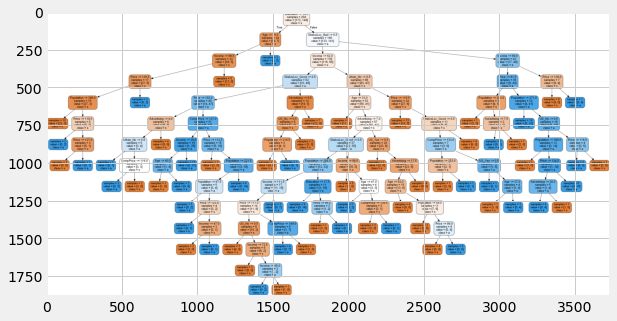

In [190]:
plt.imshow(img)

In [191]:
model.feature_importances_

array([0.10993427, 0.09983981, 0.092391  , 0.09554446, 0.22173853,
       0.12728849, 0.06004572, 0.0441093 , 0.07876649, 0.02536061,
       0.01009747, 0.01074639, 0.01270924, 0.01142821])

In [192]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [193]:
fi

,feature,importance
4,Price,0.221739
5,Age,0.127288
0,CompPrice,0.109934
1,Income,0.099840
3,Population,0.095544
2,Advertising,0.092391
8,ShelveLoc_Good,0.078766
6,Education,0.060046
7,ShelveLoc_Bad,0.044109
9,ShelveLoc_Medium,0.025361


As seen in the above table Price is most important feature